### 🧰 Import Required Libraries

In [25]:
# 📊 Data manipulation and analysis
import pandas as pd

# 📈 Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Splitting data into training and test sets
from sklearn.model_selection import train_test_split

# 🌲 Machine Learning model - Random Forest
from sklearn.ensemble import RandomForestClassifier

# ✅ Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


### 📥 Step 1: Load Dataset from CSV File

In [26]:


# 📌 Load the dataset into a pandas DataFrame from the CSV file
df = pd.read_csv("Social_Network_Ads.csv")

# ✅ Display the first few rows to verify successful loading
print("📄 Preview of the loaded dataset:")
print(df.head())


📄 Preview of the loaded dataset:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


### 🧼 Checking for Missing Values in the Dataset

In [27]:
# 📌 Check for null (missing) values in each column of the DataFrame
df.isnull().sum()

# 🖨️ Print the number of missing values per column
print("🔍 Missing Values in Each Column:")
print(df)


🔍 Missing Values in Each Column:
     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


### 🧾 What df.info() Shows:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### 📦 Splitting Features and Target

In [29]:
# 📌 Separate features (X) and target label (y)
X = df.drop("Purchased", axis=1)  # Drop the target column to get the input features
y = df["Purchased"]               # Extract the target column


### ✂️ Splitting Data into Training and Testing Sets 🧪


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Splitting the data: 80% for training (X_train, y_train) and 20% for testing (X_test, y_test)
# 'random_state=42' ensures reproducibility of the split

### 🌲 Random Forest Classifier: Training & Prediction

In [31]:

# 📌 Step 1: Initialize the model
model = RandomForestClassifier()

# 📌 Step 2: Fit the model on training data
model.fit(X_train, y_train)  # Don't overwrite X_train

# 📌 Step 3: Predict on test data
y_pred = model.predict(X_test)

### ✅ Evaluating Classification Model Performance

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📌 Print detailed metrics: precision, recall, f1-score, support
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Print overall accuracy of the model
print("✅ Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# 📌 Print confusion matrix to understand TP, TN, FP, FN
print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80

✅ Accuracy Score:
0.9
🧮 Confusion Matrix:
[[46  6]
 [ 2 26]]


### 📊 Visualizing Model Performance: Confusion Matrix 📈


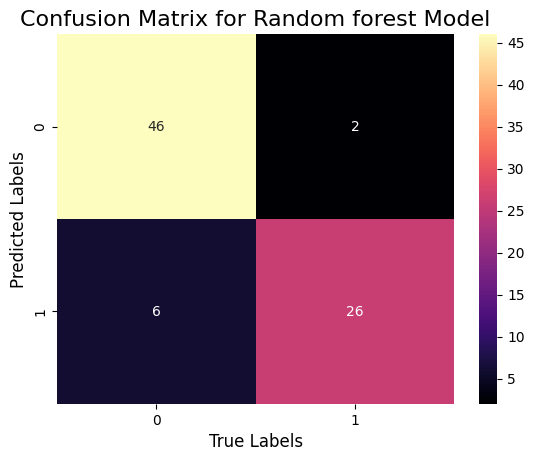

In [33]:

plt.Figure(figsize=(12,8)) # Setting up a figure with a specified size for the plot
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, fmt='d', cmap='magma') 

# Adding labels and title for better interpretation 🏷️
plt.title('Confusion Matrix for Random forest Model', fontsize=16) # Title of the plot
plt.xlabel('True Labels', fontsize=12) # Label for the X-axis
plt.ylabel('Predicted Labels', fontsize=12) # Label for the Y-axis

plt.show() # Display the plot (it's good practice to include this when creating plots)